In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SSA import SSA
from time import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_s = pd.read_csv('SN_d_tot_V2.0.csv', sep=';')

In [3]:
dates = pd.to_datetime(df_s[['year', 'month', 'day']])[:61116]

In [4]:
solar_activity = pd.DataFrame({'sunspots' : np.array(df_s.sunspot[:61116])}, index=dates)

# SSA for sin(x), L = 2$\pi$

In [5]:
sin_x = np.linspace(0, 8 * np.pi, 400, endpoint=False)
tic = time()
ssa_sin = SSA(pd.Series(np.sin(sin_x), sin_x), 100)
tac = time()
print(tac - tic, 'seconds')

trajectory matrix - OK
0.0010001659393310547 seconds

matrix rank - OK: 2
0.07200431823730469 seconds

randomized SVD - OK
0.014000892639160156 seconds

components - OK
0.009000301361083984 seconds
0.09700560569763184 seconds


In [6]:
sin_comps = ssa_sin.components_to_df()

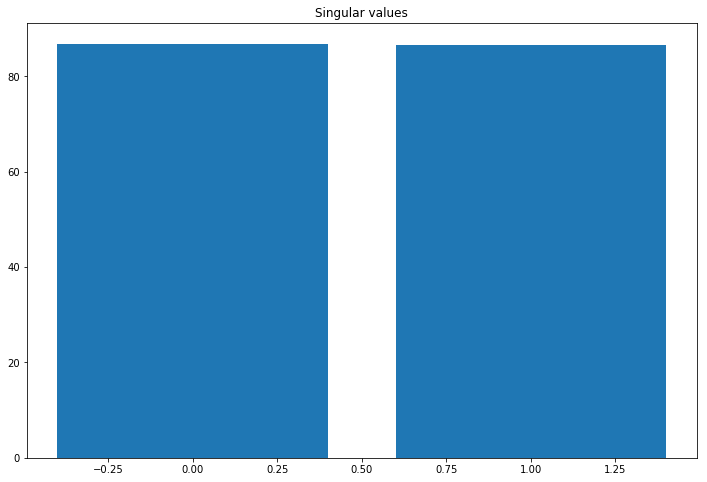

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(np.arange(ssa_sin.d), ssa_sin.Sigma)
plt.title('Singular values');
#ax.set_yscale('log')

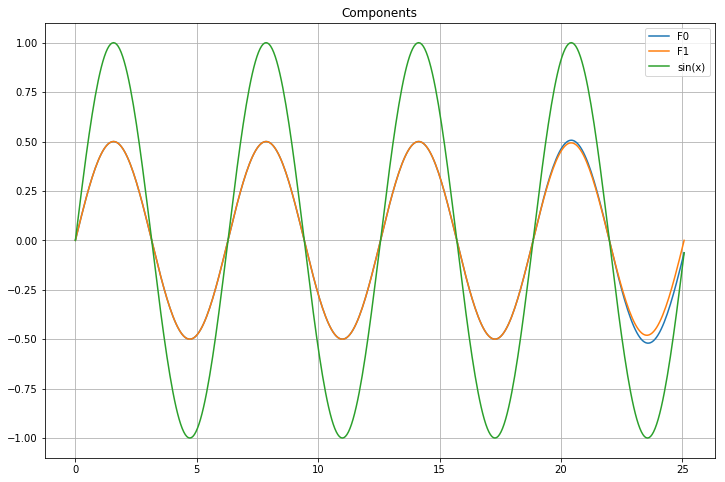

In [8]:
sin_comps.iloc[:, :].plot(figsize=(12, 8), title='Components')
plt.plot(sin_x, np.sin(sin_x), label='sin(x)')
plt.legend()
plt.grid()

## SSA for solar activity TS (L = 11 years)

In [9]:
saved_comps_sa = pd.read_csv('E:\Файлы для практики SSA\solar_activity_components.csv', engine='python', index_col=0)

In [10]:
saved_comps_sa.index = dates

In [11]:
saved_sigmas_sa = pd.read_csv('E:\Файлы для практики SSA\solar_activity_sigmas.csv', engine='python', index_col=0)

In [12]:
tic = time()
ssa_sa = SSA(pd.Series(solar_activity.sunspots, dates), 365 * 11, presolved=True, components=saved_comps_sa, sigmas=saved_sigmas_sa)
tac = time()
print(tac - tic)

presolved results saved
0.011000394821166992


In [13]:
comps_sa = ssa_sa.components_to_df().iloc[:, :100]

In [ ]:
#comps_sa.to_csv('E:\Файлы для практики SSA\solar_activity_components.csv')

In [ ]:
#plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(np.arange(100), ssa_sa.Sigma[:100])
plt.title('Singular values')
plt.xlabel('index')
plt.ylabel('singular value')
ax.set_yscale('log')
plt.savefig('sv_sol.png')

In [ ]:
#sigmas = pd.DataFrame({'sigma' : ssa_sa.Sigma[:100]})
#sigmas.head()

In [ ]:
#sigmas.to_csv('E:\Файлы для практики SSA\solar_activity_sigmas.csv')

In [ ]:
comps_sa.iloc[:, :5].plot(figsize=(12, 8), title='First 5 components')
plt.grid()
plt.savefig('comps_sol.png')

In [ ]:
ssa_sa.reconstruct([3, 4]).plot(figsize=(12, 8))
plt.grid()

In [ ]:
plt.figure(figsize=(12, 8))
ssa_sa.reconstruct(np.arange(5)).plot(label='comps F0-F4')
ssa_sa.orig_TS.plot(alpha=0.4)
plt.legend()
plt.grid()

# Prague

In [14]:
min_date = 18490101
max_date = 20160430
temps = []

with open('TG_SOUID100080.txt', 'r') as inp:
    for line in inp:
        date = line[14:22]
        temp = int(line[23:28])
        if int(date) >= min_date and int(date) <= max_date:
            if temp == -9999:
                temps.append(np.nan)
            else:
                temps.append(temp * 0.1)

In [15]:
temp_data = pd.DataFrame({'temperature' : temps}, index=dates)

In [16]:
np.sum(np.isnan(temp_data.temperature))

0

In [17]:
temp_data.dtypes

temperature    float64
dtype: object

## SSA for temperature TS (L = 11 years)

In [18]:
saved_comps_tm = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_components.csv', engine='python', index_col=0)

In [19]:
saved_comps_tm.index = dates

In [20]:
saved_sigmas_tm = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_sigmas.csv', engine='python', index_col=0)

In [21]:
tic = time()
ssa_tm = SSA(pd.Series(temp_data.temperature, dates), 365 * 11, presolved=True, components=saved_comps_tm, sigmas=saved_sigmas_tm)
tac = time()
print(tac - tic)

presolved results saved
0.026001691818237305


In [22]:
comps_tm = ssa_tm.components_to_df().iloc[:, :100]

In [23]:
#comps_tm.to_csv('E:\\Файлы для практики SSA\\temp_data_components.csv')

In [24]:
#sigmas_tm = pd.DataFrame({'sigma' : ssa_tm.Sigma[:100]})
#sigmas_tm.head()

In [25]:
#sigmas_tm.to_csv('E:\\Файлы для практики SSA\\temp_data_sigmas.csv')

In [ ]:
#plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(np.arange(100), ssa_tm.Sigma[:100])
plt.title('Singular values')
plt.xlabel('index')
plt.ylabel('singular value')
ax.set_yscale('log')
plt.savefig('sv_pr.png')

In [ ]:
comps_tm.iloc[:, :5].plot(figsize=(12, 8), title='First 5 components')
plt.grid()
plt.savefig('comps_pr.png')

In [ ]:
ssa_tm.reconstruct([3, 4]).plot(figsize=(12, 8), title='Sum of F3 and F4 components')
plt.grid()
plt.savefig('comp_pr1.png')

In [ ]:
tic = time()
fft_tm = np.abs(np.fft.rfft(ssa_tm.reconstruct([3, 4])))
tac = time()
print(tac - tic, 'seconds for FFT')

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(167 / (np.arange(40) + 10), fft_tm[9:49])
plt.xlim((167 / (np.arange(40) + 10))[0], (167 / (np.arange(40) + 10))[-1])
plt.title('FFT for F3 + F4')
plt.grid()
plt.savefig('fft_pr1.png')
plt.show()

In [ ]:
ssa_tm.reconstruct([5, 6]).plot(figsize=(12, 8), title='Sum of F5 and F6 components')
plt.grid()

In [ ]:
plt.figure(figsize=(12, 8))
ssa_tm.reconstruct(np.arange(5)).plot(label='comps F0-F4')
ssa_tm.orig_TS.plot(alpha=0.4)
plt.legend()
plt.grid()

## SSA for temperature TS (L = 90 days)

In [ ]:
saved_comps_tm_90 = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_components_90.csv', engine='python', index_col=0)

In [ ]:
saved_comps_tm_90.index = dates

In [ ]:
saved_sigmas_tm_90 = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_90.csv', engine='python', index_col=0)

In [ ]:
tic = time()
ssa_tm_90 = SSA(pd.Series(temp_data.temperature, dates), 90, presolved=True, components=saved_comps_tm_90, sigmas=saved_sigmas_tm_90)
tac = time()
print(tac - tic)

In [ ]:
comps_tm_90 = ssa_tm_90.components_to_df()

In [ ]:
#comps_tm_90.to_csv('E:\\Файлы для практики SSA\\temp_data_components_90.csv')

In [ ]:
#sigmas_tm_90 = pd.DataFrame({'sigma' : ssa_tm_90.Sigma})

In [ ]:
#sigmas_tm_90.to_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_90.csv')

In [ ]:
#plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(np.arange(90), ssa_tm_90.Sigma)
ax.set_yscale('log')

In [ ]:
comps_tm_90.iloc[:, :5].plot(figsize=(12, 8), title='First 5 components')
plt.grid()

## SSA for temperature TS (moving averaging, window = 1 year; L = 90 days)

In [ ]:
saved_comps_tmma_90 = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_components_ma90.csv', engine='python', index_col=0)

In [ ]:
saved_comps_tmma_90.index = dates[364:]

In [ ]:
saved_sigmas_tmma_90 = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_ma90.csv', engine='python', index_col=0)

In [ ]:
tic = time()
ssa_tmma_90 = SSA(pd.Series(temp_data.rolling(window=365).mean()[364:].temperature, dates[364:]), 90, presolved=True, components=saved_comps_tmma_90, sigmas=saved_sigmas_tmma_90)
tac = time()
print(tac - tic)

In [ ]:
comps_tmma_90 = ssa_tmma_90.components_to_df()

In [ ]:
#comps_tmma_90.to_csv('E:\\Файлы для практики SSA\\temp_data_components_ma90.csv')

In [ ]:
#sigmas_tmma_90 = pd.DataFrame({'sigma' : ssa_tmma_90.Sigma})

In [ ]:
#sigmas_tmma_90.to_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_ma90.csv')

In [ ]:
#plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(np.arange(90), ssa_tmma_90.Sigma)
ax.set_yscale('log')

In [ ]:
comps_tmma_90.iloc[:, :5].plot(figsize=(12, 8), title='First 5 components')
plt.grid()

In [ ]:
plt.figure(figsize=(12, 8))
ssa_tmma_90.reconstruct(np.arange(1)).plot(label='comp F0')
ssa_tmma_90.orig_TS.plot(alpha=0.4)
plt.legend()
plt.grid()

## SSA for temperature TS (L = 12 years)

In [26]:
saved_comps_tm_12 = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_components_12.csv', engine='python', index_col=0)

In [27]:
saved_comps_tm_12.index = dates

In [28]:
saved_sigmas_tm_12 = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_12.csv', engine='python', index_col=0)

In [29]:
tic = time()
ssa_tm_12 = SSA(pd.Series(temp_data.temperature, dates), 365 * 12, presolved=True, components=saved_comps_tm_12, sigmas=saved_sigmas_tm_12)
tac = time()
print(tac - tic)

presolved results saved
0.012000322341918945


In [30]:
comps_tm_12 = ssa_tm_12.components_to_df().iloc[:, :100]

In [31]:
#comps_tm_12.to_csv('E:\\Файлы для практики SSA\\temp_data_components_12.csv')

In [32]:
#sigmas_tm_12 = pd.DataFrame({'sigma' : ssa_tm_12.Sigma[:100]})

In [33]:
#sigmas_tm_12.to_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_12.csv')

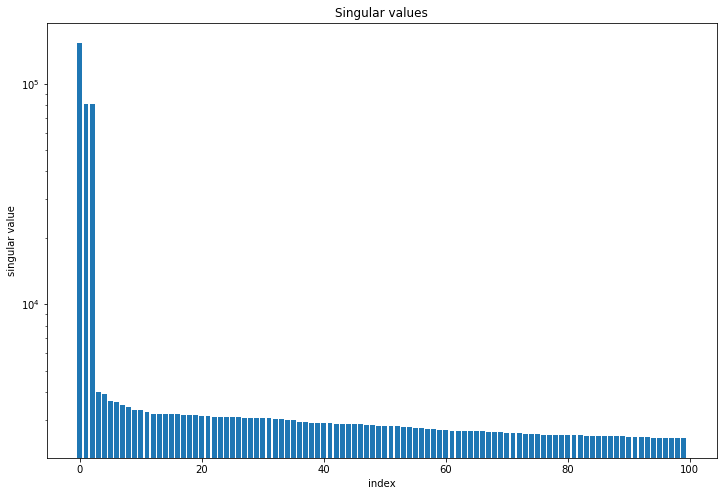

In [37]:
#plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(np.arange(100), ssa_tm_12.Sigma[:100])
plt.title('Singular values')
plt.xlabel('index')
plt.ylabel('singular value')
ax.set_yscale('log')
plt.savefig('sv_pr12')

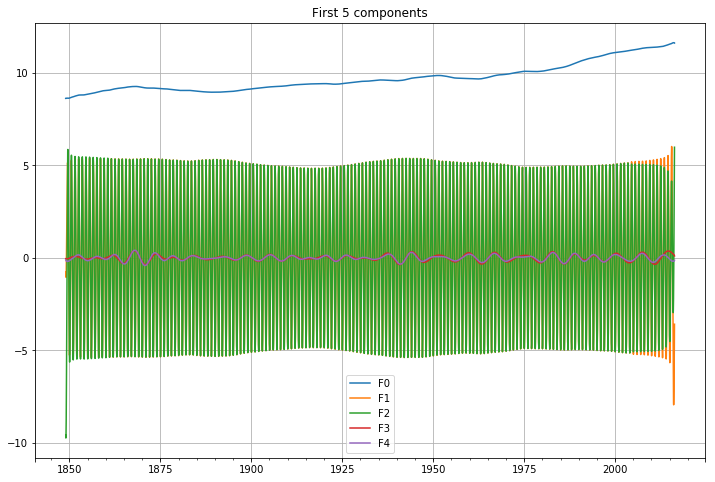

In [36]:
comps_tm_12.iloc[:, :5].plot(figsize=(12, 8), title='First 5 components')
plt.grid()
plt.savefig('comps_pr12')

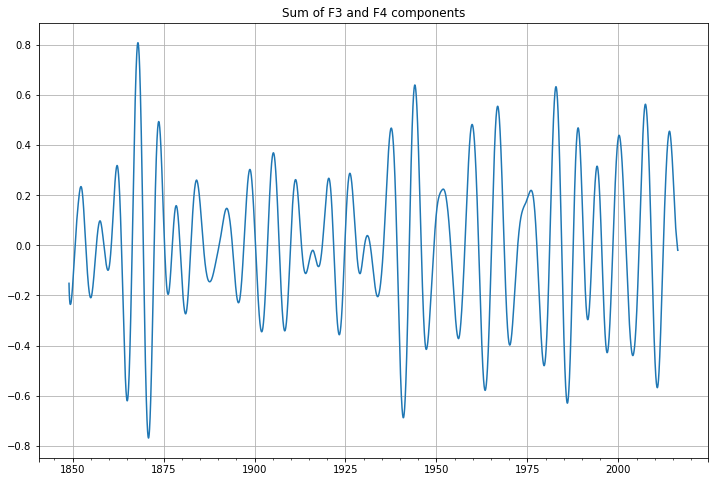

In [42]:
ssa_tm_12.reconstruct([3, 4]).plot(figsize=(12, 8), title='Sum of F3 and F4 components')
plt.grid()
plt.savefig('comp_pr12')

In [43]:
tic = time()
fft_tm_12 = np.abs(np.fft.rfft(ssa_tm_12.reconstruct([3, 4])))
tac = time()
print(tac - tic, 'seconds for FFT')

0.027001619338989258 seconds for FFT


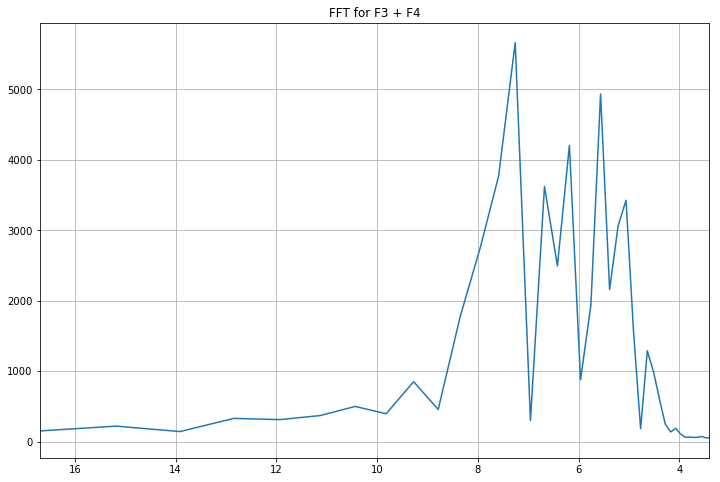

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(167 / (np.arange(40) + 10), fft_tm_12[9:49])
plt.xlim((167 / (np.arange(40) + 10))[0], (167 / (np.arange(40) + 10))[-1])
plt.title('FFT for F3 + F4')
plt.grid()
plt.savefig('fft_pr12')
plt.show()

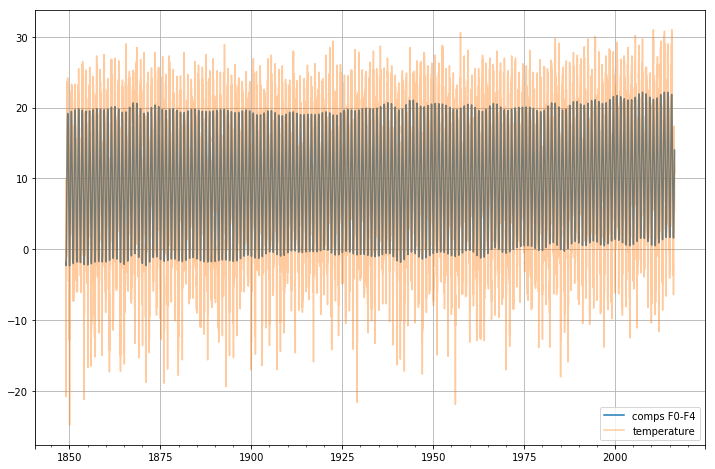

In [41]:
plt.figure(figsize=(12, 8))
ssa_tm_12.reconstruct(np.arange(5)).plot(label='comps F0-F4')
ssa_tm_12.orig_TS.plot(alpha=0.4)
plt.legend()
plt.grid()

## SSA for temperature TS (moving averaging, window = 1 year; L = 11 years)

In [45]:
saved_comps_tmma_11 = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_components_ma11.csv', engine='python', index_col=0)

In [46]:
saved_comps_tmma_11.index = dates[364:]

In [47]:
saved_sigmas_tmma_11 = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_ma11.csv', engine='python', index_col=0)

In [48]:
tic = time()
ssa_tmma_11 = SSA(pd.Series(temp_data.rolling(window=365).mean()[364:].temperature, dates[364:]), 365 * 11, presolved=True, components=saved_comps_tmma_11, sigmas=saved_sigmas_tmma_11)
tac = time()
print(tac - tic)

presolved results saved
0.016000986099243164


In [49]:
comps_tmma_11 = ssa_tmma_11.components_to_df()

In [50]:
#comps_tmma_11.iloc[:, :100].to_csv('E:\\Файлы для практики SSA\\temp_data_components_ma11.csv')

In [51]:
#sigmas_tmma_11 = pd.DataFrame({'sigma' : ssa_tmma_11.Sigma})

In [52]:
#sigmas_tmma_11.to_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_ma11.csv')

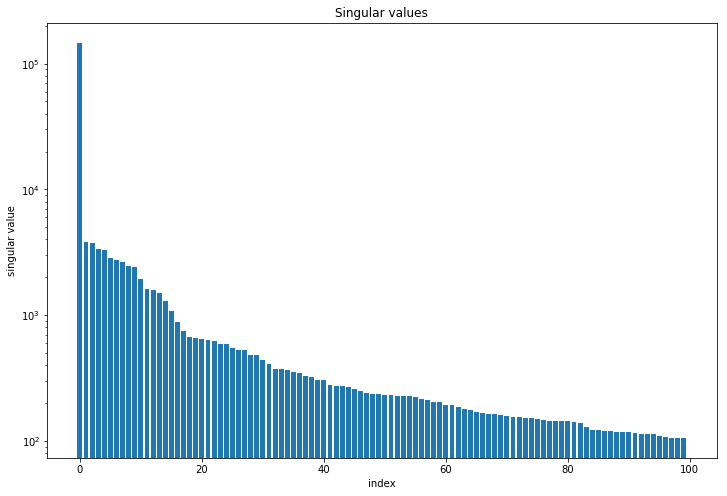

In [53]:
#plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(np.arange(100), ssa_tmma_11.Sigma[:100])
plt.title('Singular values')
plt.xlabel('index')
plt.ylabel('singular value')
ax.set_yscale('log')
plt.savefig('sv_prma11')

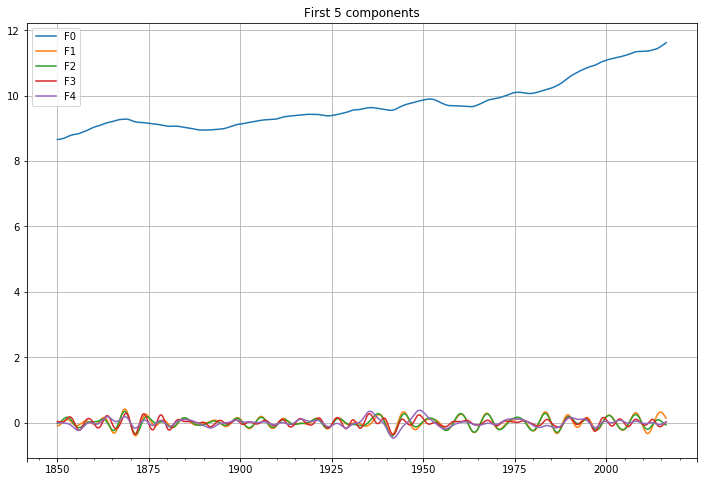

In [55]:
comps_tmma_11.iloc[:, :5].plot(figsize=(12, 8), title='First 5 components')
plt.grid()
plt.savefig('comps_prma11')

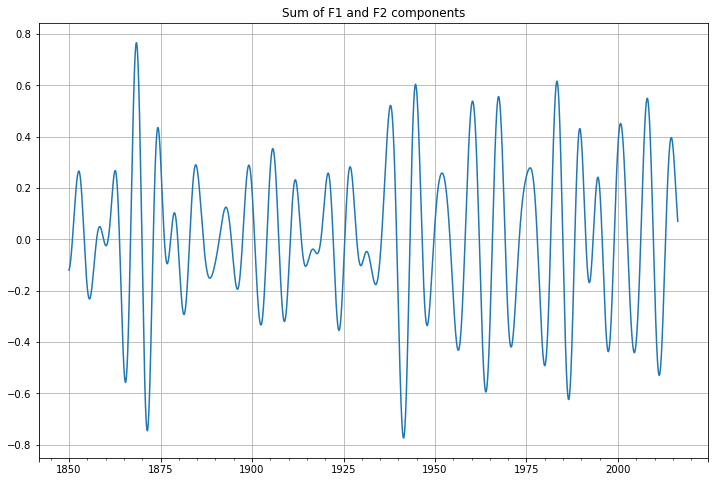

In [56]:
ssa_tmma_11.reconstruct([1, 2]).plot(figsize=(12, 8), title='Sum of F1 and F2 components')
plt.grid()
plt.savefig('comp_prma11')

In [57]:
tic = time()
fft_tmma_11 = np.abs(np.fft.rfft(ssa_tmma_11.reconstruct([1, 2])))
tac = time()
print(tac - tic, 'seconds for FFT')

0.11700654029846191 seconds for FFT


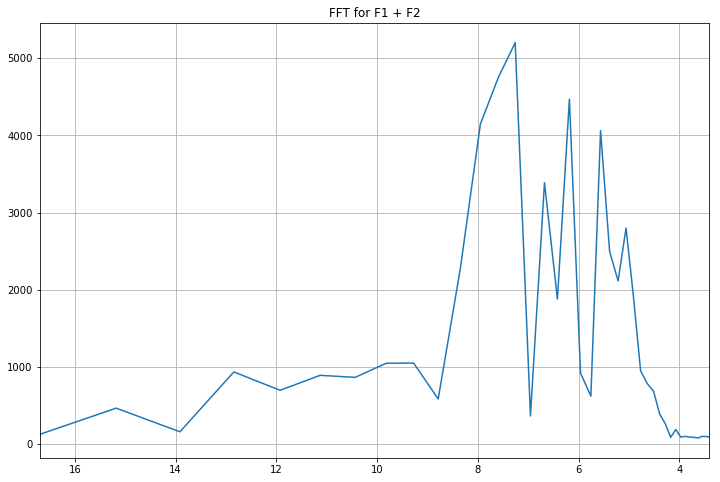

In [58]:
plt.figure(figsize=(12, 8))
plt.plot(167 / (np.arange(40) + 10), fft_tmma_11[9:49])
plt.xlim((167 / (np.arange(40) + 10))[0], (167 / (np.arange(40) + 10))[-1])
plt.title('FFT for F1 + F2')
plt.grid()
plt.savefig('fft_prma11')
plt.show()

In [ ]:
ssa_tmma_11.reconstruct([3, 4]).plot(figsize=(12, 8), title='Sum of F3 and F4 components')
plt.grid()

In [ ]:
tic = time()
fft_tmma_11 = np.abs(np.fft.rfft(ssa_tmma_11.reconstruct([3, 4])))
tac = time()
print(tac - tic, 'seconds for FFT')

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(167 / (np.arange(40) + 10), fft_tmma_11[9:49])
plt.xlim((167 / (np.arange(40) + 10))[0], (167 / (np.arange(40) + 10))[-1])
plt.title('FFT for F3 + F4')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
ssa_tmma_11.reconstruct(np.arange(1)).plot(label='comp F0')
ssa_tmma_11.orig_TS.plot(alpha=0.4)
plt.legend()
plt.grid()

## SSA for temperature TS (moving averaging, window = 1 year; L = 4 years)

In [ ]:
saved_comps_tmma_4 = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_components_ma4.csv', engine='python', index_col=0)

In [ ]:
saved_comps_tmma_4.index = dates[364:]

In [ ]:
saved_sigmas_tmma_4 = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_ma4.csv', engine='python', index_col=0)

In [ ]:
tic = time()
ssa_tmma_4 = SSA(pd.Series(temp_data.rolling(window=365).mean()[364:].temperature, dates[364:]), 365 * 4, presolved=True, components=saved_comps_tmma_4, sigmas=saved_sigmas_tmma_4)
tac = time()
print(tac - tic)

In [ ]:
comps_tmma_4 = ssa_tmma_4.components_to_df()

In [ ]:
#comps_tmma_4.iloc[:, :100].to_csv('E:\\Файлы для практики SSA\\temp_data_components_ma4.csv')

In [ ]:
#sigmas_tmma_4 = pd.DataFrame({'sigma' : ssa_tmma_4.Sigma})

In [ ]:
#sigmas_tmma_4.to_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_ma4.csv')

In [ ]:
#plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(np.arange(100), ssa_tmma_4.Sigma[:100])
plt.title('The first 100 singular values')
ax.set_yscale('log')

In [ ]:
comps_tmma_4.iloc[:, :5].plot(figsize=(12, 8), title='First 5 components')
plt.grid()

In [ ]:
comps_tmma_4.iloc[:, :1].plot(figsize=(12, 8), title='First 5 components')
plt.grid()

In [ ]:
comps_tmma_4.iloc[:, 1:3].plot(figsize=(12, 8), title='F1 and F2')
plt.grid()

In [ ]:
ssa_tmma_4.reconstruct([1, 2]).plot(figsize=(12, 8), title='Sum of F1 and F2 components')
plt.grid()

In [ ]:
ssa_tmma_4.reconstruct([1]).plot(figsize=(12, 8), title='F1')
plt.grid()

In [ ]:
tic = time()
fft_tmma_4 = np.abs(np.fft.rfft(ssa_tmma_4.reconstruct([1])))
tac = time()
print(tac - tic, 'seconds for FFT')

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(167 / (np.arange(70) + 10), fft_tmma_4[9:79])
plt.xlim((167 / (np.arange(70) + 10))[0], (167 / (np.arange(70) + 10))[-1])
plt.title('FFT for F1')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
ssa_tmma_4.reconstruct(np.arange(1)).plot(label='comp F0')
ssa_tmma_4.orig_TS.plot(alpha=0.4)
plt.legend()
plt.grid()

## FFT on smoothed by moving averaging temperature data

In [ ]:
tic = time()
fft_ma = np.abs(np.fft.rfft(temp_data.rolling(window=365).mean()[364:].temperature))
tac = time()
print(tac - tic, 'seconds for FFT')

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(167 / (np.arange(40) + 5), fft_ma[4:44])
plt.xlim((167 / (np.arange(40) + 5))[0], (167 / (np.arange(40) + 5))[-1])
plt.title('FFT for smoothed Prague data')
plt.grid()
plt.show()

## Components of interest from different experiments

In [ ]:
ssa_tm.reconstruct([3, 4]).plot(figsize=(12, 8), label='F3 + F4 from: L = 11 year', linestyle='--', linewidth=3, alpha=0.7)
ssa_tm_12.reconstruct([3, 4]).plot(figsize=(12, 8), label='F3 + F4 from: L = 12 year',linewidth=1.5)
ssa_tmma_11.reconstruct([1, 2]).plot(figsize=(12, 8), label='F1 + F2 from: moving averaging, L = 11 year', linewidth=1.5)
ssa_tmma_4.reconstruct([1]).plot(figsize=(12, 8), label='F1 from: moving averaging, L = 4 year', linewidth=1.5)
plt.title('Components of interest from Prague data')
plt.legend()
plt.grid()
plt.savefig('int_comps_pr.png')

# Bologna

In [ ]:
min_date_bol = 18490101
max_date_bol = 20031231
temps = []

with open('TG_SOUID100862.txt', 'r') as inp:
    for line in inp:
        date = line[14:22]
        temp = int(line[23:28])
        if int(date) >= min_date_bol and int(date) <= max_date_bol:
            if temp == -9999:
                temps.append(np.nan)
            else:
                temps.append(temp * 0.1)
                
dates_bol = dates[:len(temps)]

In [ ]:
temp_data_bol = pd.DataFrame({'temperature' : temps}, index=dates_bol)

In [ ]:
np.sum(np.isnan(temp_data_bol.temperature))

In [ ]:
nan_inds = np.arange(temp_data_bol.shape[0])[np.isnan(temp_data_bol.temperature)]

In [ ]:
for ind in nan_inds:
    temp_data_bol.temperature[ind] = temp_data_bol.temperature[ind - 1]

In [ ]:
np.sum(np.isnan(temp_data_bol.temperature))

In [ ]:
temp_data_bol.dtypes

## SSA for temperature TS (moving averaging, window = 1 year; L = 11 years)

In [ ]:
saved_comps_tmma_11_bol = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_components_ma11_bol.csv', engine='python', index_col=0)

In [ ]:
saved_comps_tmma_11_bol.index = dates_bol[364:]

In [ ]:
saved_sigmas_tmma_11_bol = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_ma11_bol.csv', engine='python', index_col=0)

In [ ]:
tic = time()
ssa_tmma_11_bol = SSA(pd.Series(temp_data_bol.rolling(window=365).mean()[364:].temperature, dates_bol[364:]), 365 * 11, presolved=True, components=saved_comps_tmma_11_bol, sigmas=saved_sigmas_tmma_11_bol)
tac = time()
print(tac - tic)

In [ ]:
comps_tmma_11_bol = ssa_tmma_11_bol.components_to_df()

In [ ]:
#comps_tmma_11_bol.iloc[:, :100].to_csv('E:\\Файлы для практики SSA\\temp_data_components_ma11_bol.csv')

In [ ]:
#sigmas_tmma_11_bol = pd.DataFrame({'sigma' : ssa_tmma_11_bol.Sigma})

In [ ]:
#sigmas_tmma_11_bol.to_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_ma11_bol.csv')

In [ ]:
#plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(np.arange(100), ssa_tmma_11_bol.Sigma[:100])
ax.set_yscale('log')

In [ ]:
comps_tmma_11_bol.iloc[:, :6].plot(figsize=(12, 8), title='First 6 components')
plt.grid()
plt.savefig('comps_bol.png')

In [ ]:
comps_tmma_11_bol.iloc[:, 1].plot(figsize=(12, 8), title='F1')
plt.grid()

In [ ]:
tic = time()
fft_tmma_11_bol = np.abs(np.fft.rfft(ssa_tmma_11_bol.reconstruct([1])))
tac = time()
print(tac - tic, 'seconds for FFT')

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(155 / (np.arange(40) + 10), fft_tmma_11_bol[9:49])
plt.xlim((155 / (np.arange(40) + 10))[0], (155 / (np.arange(40) + 10))[-1])
plt.title('FFT for F1')
plt.grid()
plt.show()

In [ ]:
ssa_tmma_11_bol.reconstruct([2, 3]).plot(figsize=(12, 8), title='Sum of F2 and F3 components')
plt.grid()
plt.savefig('comp_bol.png')

In [ ]:
tic = time()
fft_tmma_11_bol = np.abs(np.fft.rfft(ssa_tmma_11_bol.reconstruct([2, 3])))
tac = time()
print(tac - tic, 'seconds for FFT')

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(155 / (np.arange(40) + 10), fft_tmma_11_bol[9:49])
plt.xlim((155 / (np.arange(40) + 10))[0], (155 / (np.arange(40) + 10))[-1])
plt.title('FFT for F2 + F3')
plt.grid()
plt.savefig('fft_bol.png')
plt.show()

In [ ]:
ssa_tmma_11_bol.reconstruct([4, 5, 6]).plot(figsize=(12, 8), title='Sum of F4, F5 and F6 components')
plt.grid()

In [ ]:
tic = time()
fft_tmma_11_bol = np.abs(np.fft.rfft(ssa_tmma_11_bol.reconstruct([4, 5, 6])))
tac = time()
print(tac - tic, 'seconds for FFT')

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(155 / (np.arange(40) + 15), fft_tmma_11_bol[14:54])
plt.xlim((155 / (np.arange(40) + 15))[0], (155 / (np.arange(40) + 15))[-1])
plt.title('FFT for F4 + F5 + F6')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
ssa_tmma_11_bol.reconstruct(np.arange(1)).plot(label='comp F0')
ssa_tmma_11_bol.orig_TS.plot(alpha=0.4)
plt.legend()
plt.grid()

## Components of interest: Prague and Bologna

In [ ]:
ssa_tmma_11.reconstruct([1, 2]).plot(figsize=(12, 8), label='F1 + F2 from: moving averaging, L = 11 year, Prague')
ssa_tmma_11_bol.reconstruct([2, 3]).plot(figsize=(12, 8), label='F2 + F3 from: moving averaging, L = 11 year, Bologna')
plt.title('Components of interest from Prague and Bologna data')
plt.legend()
plt.grid()
plt.savefig('pr_bol.png')

# Hohenpeissenberg

In [ ]:
min_date_hoh = 18490101
max_date_hoh = 20160430
temps = []

with open('TG_SOUID100167.txt', 'r') as inp:
    for line in inp:
        date = line[14:22]
        temp = int(line[23:28])
        if int(date) >= min_date_hoh and int(date) <= max_date_hoh:
            if temp == -9999:
                temps.append(np.nan)
            else:
                temps.append(temp * 0.1)
                
dates_hoh = dates[:len(temps)]

In [ ]:
temp_data_hoh = pd.DataFrame({'temperature' : temps}, index=dates_hoh)

In [ ]:
np.sum(np.isnan(temp_data_hoh.temperature))

In [ ]:
nan_inds = np.arange(temp_data_hoh.shape[0])[np.isnan(temp_data_hoh.temperature)]

In [ ]:
for ind in nan_inds:
    temp_data_hoh.temperature[ind] = temp_data_hoh.temperature[ind - 365]

In [ ]:
np.sum(np.isnan(temp_data_hoh.temperature))

In [ ]:
temp_data_hoh.dtypes

## SSA for temperature TS (moving averaging, window = 1 year; L = 11 years)

In [ ]:
saved_comps_tmma_11_hoh = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_components_ma11_hoh.csv', engine='python', index_col=0)

In [ ]:
saved_comps_tmma_11_hoh.index = dates_hoh[364:]

In [ ]:
saved_sigmas_tmma_11_hoh = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_ma11_hoh.csv', engine='python', index_col=0)

In [ ]:
tic = time()
ssa_tmma_11_hoh = SSA(pd.Series(temp_data_hoh.rolling(window=365).mean()[364:].temperature, dates_hoh[364:]), 365 * 11, presolved=True, components=saved_comps_tmma_11_hoh, sigmas=saved_sigmas_tmma_11_hoh)
tac = time()
print(tac - tic)

In [ ]:
comps_tmma_11_hoh = ssa_tmma_11_hoh.components_to_df()

In [ ]:
#comps_tmma_11_hoh.iloc[:, :100].to_csv('E:\\Файлы для практики SSA\\temp_data_components_ma11_hoh.csv')

In [ ]:
#sigmas_tmma_11_hoh = pd.DataFrame({'sigma' : ssa_tmma_11_hoh.Sigma})

In [ ]:
#sigmas_tmma_11_hoh.to_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_ma11_hoh.csv')

In [ ]:
#plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(np.arange(100), ssa_tmma_11_hoh.Sigma[:100])
ax.set_yscale('log')

In [ ]:
comps_tmma_11_hoh.iloc[:, :6].plot(figsize=(12, 8), title='First 6 components')
plt.grid()
plt.savefig('comps_hoh')

In [ ]:
ssa_tmma_11_hoh.reconstruct([1, 2]).plot(figsize=(12, 8), title='Sum of F1 and F2 components')
plt.grid()

In [ ]:
tic = time()
fft_tmma_11_hoh = np.abs(np.fft.rfft(ssa_tmma_11_hoh.reconstruct([1, 2])))
tac = time()
print(tac - tic, 'seconds for FFT')

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(167 / (np.arange(40) + 10), fft_tmma_11_hoh[9:49])
plt.xlim((167 / (np.arange(40) + 10))[0], (167 / (np.arange(40) + 10))[-1])
plt.title('FFT for F1 + F2')
plt.grid()
plt.show()

In [ ]:
ssa_tmma_11_hoh.reconstruct([3, 4]).plot(figsize=(12, 8), title='Sum of F3 and F4 components')
plt.grid()
plt.savefig('comp_hoh')

In [ ]:
tic = time()
fft_tmma_11_hoh = np.abs(np.fft.rfft(ssa_tmma_11_hoh.reconstruct([3, 4])))
tac = time()
print(tac - tic, 'seconds for FFT')

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(167 / (np.arange(40) + 10), fft_tmma_11_hoh[9:49])
plt.xlim((167 / (np.arange(40) + 10))[0], (167 / (np.arange(40) + 10))[-1])
plt.title('FFT for F3 + F4')
plt.grid()
plt.savefig('fft_hoh')
plt.show()

In [ ]:
ssa_tmma_11_hoh.reconstruct([5, 6]).plot(figsize=(12, 8), title='Sum of F5 and F6 components')
plt.grid()

In [ ]:
tic = time()
fft_tmma_11_hoh = np.abs(np.fft.rfft(ssa_tmma_11_hoh.reconstruct([5, 6])))
tac = time()
print(tac - tic, 'seconds for FFT')

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(167 / (np.arange(40) + 15), fft_tmma_11_hoh[14:54])
plt.xlim((167 / (np.arange(40) + 15))[0], (167 / (np.arange(40) + 15))[-1])
plt.title('FFT for F5 + F6')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
ssa_tmma_11_hoh.reconstruct(np.arange(1)).plot(label='comp F0')
ssa_tmma_11_hoh.orig_TS.plot(alpha=0.4)
plt.legend()
plt.grid()

## Components of interest: Prague and Hohenpeissenberg

In [ ]:
ssa_tmma_11.reconstruct([1, 2]).plot(figsize=(12, 8), label='F1 + F2 from: moving averaging, L = 11 year, Prague')
ssa_tmma_11_hoh.reconstruct([3, 4]).plot(figsize=(12, 8), label='F3 + F4 from: moving averaging, L = 11 year, Hohenpeissenberg')
plt.title('Components of interest from Prague and Hohenpeissenberg data')
plt.legend()
plt.grid()

In [ ]:
ssa_tmma_11.reconstruct([1, 2]).plot(figsize=(12, 8), label='F1 + F2 from: moving averaging, L = 11 year, Prague')
ssa_tmma_11_hoh.reconstruct([1, 2]).plot(figsize=(12, 8), label='F1 + F2 from: moving averaging, L = 11 year, Hohenpeissenberg')
plt.title('Components of interest from Prague and Hohenpeissenberg data')
plt.legend()
plt.grid()

In [ ]:
ssa_tmma_11.reconstruct([1, 2]).plot(figsize=(12, 8), label='F1 + F2 from: moving averaging, L = 11 year, Prague')
ssa_tmma_11_hoh.reconstruct([2, 3]).plot(figsize=(12, 8), label='F2 + F3 from: moving averaging, L = 11 year, Hohenpeissenberg')
plt.title('Components of interest from Prague and Hohenpeissenberg data')
plt.legend()
plt.grid()
plt.savefig('pr_hoh')

In [ ]:
ssa_tmma_11.reconstruct([1, 2]).plot(figsize=(12, 8), label='F1 + F2 from: moving averaging, L = 11 year, Prague')
ssa_tmma_11_hoh.reconstruct([2]).plot(figsize=(12, 8), label='F2 from: moving averaging, L = 11 year, Hohenpeissenberg')
plt.title('Components of interest from Prague and Hohenpeissenberg data')
plt.legend()
plt.grid()

# Jena

In [ ]:
min_date_jen = 18490101
max_date_jen = 20160430
temps = []

with open('TG_SOUID100172.txt', 'r') as inp:
    for line in inp:
        date = line[14:22]
        temp = int(line[23:28])
        if int(date) >= min_date_jen and int(date) <= max_date_jen:
            if temp == -9999:
                temps.append(np.nan)
            else:
                temps.append(temp * 0.1)
                
dates_jen = dates[:len(temps)]

In [ ]:
temp_data_jen = pd.DataFrame({'temperature' : temps}, index=dates_jen)

In [ ]:
np.sum(np.isnan(temp_data_jen.temperature))

In [ ]:
nan_inds = np.arange(temp_data_jen.shape[0])[np.isnan(temp_data_jen.temperature)]

In [ ]:
for ind in nan_inds:
    temp_data_jen.temperature[ind] = temp_data_jen.temperature[ind - 365]

In [ ]:
np.sum(np.isnan(temp_data_jen.temperature))

In [ ]:
temp_data_jen.dtypes

## SSA for temperature TS (moving averaging, window = 1 year; L = 11 years)

In [ ]:
saved_comps_tmma_11_jen = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_components_ma11_jen.csv', engine='python', index_col=0)

In [ ]:
saved_comps_tmma_11_jen.index = dates_jen[364:]

In [ ]:
saved_sigmas_tmma_11_jen = pd.read_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_ma11_jen.csv', engine='python', index_col=0)

In [ ]:
tic = time()
ssa_tmma_11_jen = SSA(pd.Series(temp_data_jen.rolling(window=365).mean()[364:].temperature, dates_jen[364:]), 365 * 11, presolved=True, components=saved_comps_tmma_11_jen, sigmas=saved_sigmas_tmma_11_jen)
tac = time()
print(tac - tic)

In [ ]:
comps_tmma_11_jen = ssa_tmma_11_jen.components_to_df()

In [ ]:
#comps_tmma_11_jen.iloc[:, :100].to_csv('E:\\Файлы для практики SSA\\temp_data_components_ma11_jen.csv')

In [ ]:
#sigmas_tmma_11_jen = pd.DataFrame({'sigma' : ssa_tmma_11_jen.Sigma})

In [ ]:
#sigmas_tmma_11_jen.to_csv('E:\\Файлы для практики SSA\\temp_data_sigmas_ma11_jen.csv')

In [ ]:
#plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(np.arange(100), ssa_tmma_11_jen.Sigma[:100])
ax.set_yscale('log')

In [ ]:
comps_tmma_11_jen.iloc[:, :5].plot(figsize=(12, 8), title='First 5 components')
plt.grid()
plt.savefig('comps_jen')

In [ ]:
ssa_tmma_11_jen.reconstruct([1, 2]).plot(figsize=(12, 8), title='Sum of F1 and F2 components')
plt.grid()
plt.savefig('comp_jen')

In [ ]:
tic = time()
fft_tmma_11_jen = np.abs(np.fft.rfft(ssa_tmma_11_jen.reconstruct([1, 2])))
tac = time()
print(tac - tic, 'seconds for FFT')

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(167 / (np.arange(40) + 10), fft_tmma_11_jen[9:49])
plt.xlim((167 / (np.arange(40) + 10))[0], (167 / (np.arange(40) + 10))[-1])
plt.title('FFT for F1 + F2')
plt.grid()
plt.savefig('fft_jen')
plt.show()

In [ ]:
ssa_tmma_11_jen.reconstruct([3, 4]).plot(figsize=(12, 8), title='Sum of F3 and F4 components')
plt.grid()

In [ ]:
tic = time()
fft_tmma_11_jen = np.abs(np.fft.rfft(ssa_tmma_11_jen.reconstruct([3, 4])))
tac = time()
print(tac - tic, 'seconds for FFT')

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(167 / (np.arange(40) + 10), fft_tmma_11_jen[9:49])
plt.xlim((167 / (np.arange(40) + 10))[0], (167 / (np.arange(40) + 10))[-1])
plt.title('FFT for F3 + F4')
plt.grid()
plt.show()

In [ ]:
ssa_tmma_11_jen.reconstruct([4, 5, 6]).plot(figsize=(12, 8), title='Sum of F4, F5 and F6 components')
plt.grid()

In [ ]:
plt.figure(figsize=(12, 8))
ssa_tmma_11_jen.reconstruct(np.arange(1)).plot(label='comp F0')
ssa_tmma_11_jen.orig_TS.plot(alpha=0.4)
plt.legend()
plt.grid()

## Components of interest: Prague and Jena

In [ ]:
ssa_tmma_11.reconstruct([1, 2]).plot(figsize=(12, 8), label='F1 + F2 from: moving averaging, L = 11 year, Prague')
ssa_tmma_11_jen.reconstruct([1, 2]).plot(figsize=(12, 8), label='F2 + F3 from: moving averaging, L = 11 year, Jena')
plt.title('Components of interest from Prague and Jena data')
plt.legend()
plt.grid()
plt.savefig('pr_jen')

# Components of interest: Prague, Bologna and Jena

In [ ]:
ssa_tmma_11.reconstruct([1, 2]).plot(figsize=(12, 8), label='F1 + F2 from: moving averaging, L = 11 year, Prague')
ssa_tmma_11_bol.reconstruct([2, 3]).plot(figsize=(12, 8), label='F2 + F3 from: moving averaging, L = 11 year, Bologna')
ssa_tmma_11_jen.reconstruct([1, 2]).plot(figsize=(12, 8), label='F1 + F2 from: moving averaging, L = 11 year, Jena')
plt.title('Components of interest from Prague, Bologna and Jena data')
plt.legend()
plt.grid()
plt.savefig('pr_bol_jen')

# Components of interest: Prague, Bologna and Hohenpeissenberg

In [ ]:
ssa_tmma_11.reconstruct([1, 2]).plot(figsize=(12, 8), label='F1 + F2 from: moving averaging, L = 11 year, Prague')
ssa_tmma_11_bol.reconstruct([2, 3]).plot(figsize=(12, 8), label='F2 + F3 from: moving averaging, L = 11 year, Bologna')
ssa_tmma_11_hoh.reconstruct([2, 3]).plot(figsize=(12, 8), label='F2 + F3 from: moving averaging, L = 11 year, Hohenpeissenberg')
plt.title('Components of interest from Prague, Bologna and Hohenpeissenberg data')
plt.legend()
plt.grid()
plt.savefig('pr_bol_hoh')